# Sustainable Income Planning

## Simple Income Calculation (too simple)

A Trader has created a levered trading strategy that (on average) generates an __annualized mean return of 105%__ (log) with a __standard deviation of 67%__. <br>
The applicable (flat) __tax rate is 25%__ and the __inflation__ protection shall be __3% p.a.__<br>
Calculate the Trader´s __sustainable income__ if the trader starts with __USD 10,000__ (available funds for trading).

In [20]:
import numpy as np

In [2]:
ann_mean = 1.05 # annualize mean return
ann_std = 0.67  # annualize mean std (risk)

In [3]:
# Compund annualize growth rate 
cagr = np.exp(ann_mean) - 1
cagr

1.8576511180631639

In [4]:
I0 = 10000 # initial investment on the strategy. 
tax_rate = 0.25 
infl = 0.03 # influsion (~3% in a year)

In [5]:
# Compute the annualize income (naive):
ann_income = I0 * (cagr * (1-tax_rate) - infl)
ann_income

13632.38338547373

In [6]:
monthly_income = ann_income / 12
monthly_income

1136.0319487894774

Is that realistic? __No!__ It assumes __zero risk__ and __annual year-end distributions__.

---

# Introduction to Simulations (Part 1)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [23]:
ann_mean = 1.05 # annualize mean log return
ann_std = 0.67  # annualize mean risk

In [24]:
# trades oer year
td_per_year = 259
td_per_year

259

In [25]:
# compute daily mean log return
daily_mean = ann_mean / td_per_year
daily_mean

0.004054054054054054

In [26]:
# compute daily mean risk
daily_std = ann_std / np.sqrt(td_per_year)
daily_std

0.04163177432208041

__Returns follow a random process__. It can get better/worse than the average/expected performance (random noise). 

__One Simulation (over a 1-year period)__

In [45]:
days = 259

In [46]:
# Let's simulate the daily returns of our strategy over one year: 

# so we create normal distribution, based on the mean return and risk.
# normal distribution (simplified)
returns = np.random.normal(loc = daily_mean, # mean
                           scale = daily_std, # std
                           size = days) 

# Note: its simplification, because returns disgribution tend not following
#       after normal distribution.

In [47]:
returns = np.insert(returns, 0, 0)

In [48]:
returns
# This is the normal distribution returns:

array([ 0.00000000e+00,  1.67012846e-02,  1.42024552e-02, -8.43010141e-02,
       -2.61753613e-02, -2.05222197e-02, -1.04323187e-02, -1.46132854e-02,
        2.12404316e-02,  2.90698591e-02, -4.30581656e-02,  3.26469401e-02,
        2.84406210e-02,  2.34448883e-02, -5.49754093e-02,  2.23962769e-02,
        7.49264792e-03,  4.40571965e-02,  7.83399935e-02,  7.01681379e-02,
        8.74363081e-03,  3.97600731e-03,  3.03631824e-02, -4.23670376e-02,
       -5.63404591e-02, -1.56182329e-02,  5.48685036e-02, -9.73140453e-03,
        6.66091632e-02, -1.12020032e-01, -6.20241657e-02, -1.09532736e-03,
        4.10311688e-02,  1.15552092e-03,  7.18605820e-05, -1.01426040e-03,
       -6.93385066e-02,  5.22665161e-02, -2.43706527e-02,  4.94132318e-02,
        1.11803903e-03,  4.85234662e-02,  1.83444929e-02, -3.86994263e-04,
        1.34737279e-02, -5.72686173e-02,  4.30506564e-03,  7.54958575e-02,
        5.85164733e-02, -3.69542254e-02,  2.51066533e-02,  1.43778967e-02,
        3.80750521e-02,  

In [49]:
len(returns)

260

In [50]:
# Calculate the cumelative return 
creturns = np.exp(returns.cumsum())
creturns

array([1.        , 1.01684153, 1.03138622, 0.94800332, 0.92351094,
       0.90475159, 0.895362  , 0.88237296, 0.9013154 , 0.92790106,
       0.88879529, 0.91829059, 0.94478228, 0.96719429, 0.91545754,
       0.9361917 , 0.9432326 , 0.9857178 , 1.06604423, 1.14353342,
       1.15357589, 1.15817165, 1.19387674, 1.14435223, 1.0816615 ,
       1.0648991 , 1.12496121, 1.11406685, 1.19080114, 1.0646076 ,
       1.00058228, 0.99948692, 1.04135001, 1.042554  , 1.04262893,
       1.04157196, 0.97179789, 1.02394118, 0.99928869, 1.04990708,
       1.05108157, 1.10334135, 1.12376838, 1.12333357, 1.13857149,
       1.07519902, 1.0798378 , 1.16451734, 1.23469401, 1.18989962,
       1.2201522 , 1.23782214, 1.28586102, 1.29615522, 1.28883051,
       1.36777564, 1.38576014, 1.46604762, 1.53294323, 1.51851767,
       1.51412268, 1.6474565 , 1.66738809, 1.62211263, 1.54933145,
       1.62001018, 1.63748217, 1.59080099, 1.64275691, 1.66043655,
       1.5558252 , 1.6009035 , 1.69914521, 1.89790467, 1.90838

__Plot the cumelative return__

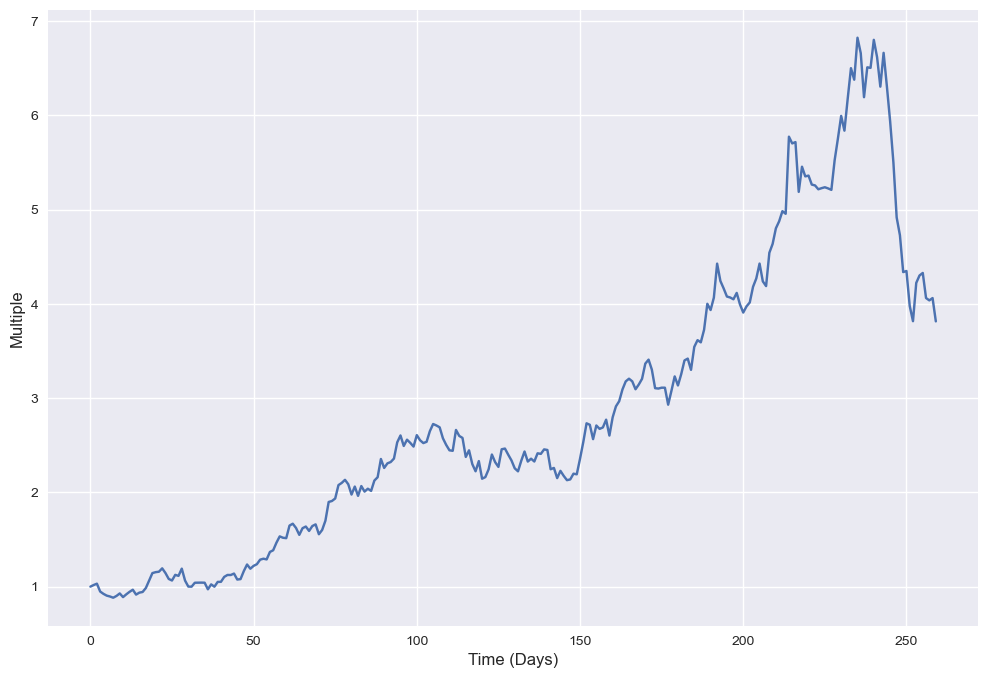

In [51]:
plt.figure(figsize = (12, 8))
plt.plot(creturns)
plt.xlabel("Time (Days)", fontsize = 12)
plt.ylabel("Multiple",  fontsize = 12)
plt.show()

In [52]:
# Compute the actual annualize mean log return:
np.mean(returns) * td_per_year

1.333456620569112

In [53]:
# Compute the actual annualize risk
np.std(returns) * np.sqrt(td_per_year)

0.6900571303909174

__How good/bad can it get? -> Many Simulations__

---

# Introduction to Simulations (Part 2)

__Many Simulations (each over 1-year period)__

> So now, we are going to run 1000 simulations (on 1000 different random return distributions) based on the mean return & std of our strategy (e.g cross SMA or whatever...)

In [55]:
sims = 1000 # number of simulations
sims

1000

In [56]:
days

259

In [57]:
np.random.seed(123)
returns = np.random.normal(loc = daily_mean, # mean
                           scale = daily_std, # std
                           size = days * sims # define the size (days * number of simulation) 
                         ).reshape(days, sims) # then reshape it

# check the shape:
returns.shape
# (259, 1000) -> 250 array of 1000 observations. 

(259, 1000)

In [58]:
returns

array([[-0.04114267,  0.04557531,  0.01583495, ..., -0.03380284,
         0.02363197, -0.04221677],
       [-0.02712096,  0.02768403,  0.03395194, ..., -0.01090411,
        -0.06296041,  0.004619  ],
       [-0.06981002, -0.04596141,  0.04969317, ...,  0.08900086,
         0.04634848, -0.06396345],
       ...,
       [ 0.03950395,  0.03534108,  0.0702441 , ..., -0.03464241,
        -0.02268064, -0.06339479],
       [-0.1057529 ,  0.02532939,  0.01398934, ..., -0.01974085,
         0.04955439, -0.02298456],
       [ 0.04087776, -0.05421596, -0.02584539, ..., -0.01003307,
        -0.01759928,  0.05507618]])

In [59]:
returns = np.insert(returns, 0, 0, axis = 0)
returns


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04114267,  0.04557531,  0.01583495, ..., -0.03380284,
         0.02363197, -0.04221677],
       [-0.02712096,  0.02768403,  0.03395194, ..., -0.01090411,
        -0.06296041,  0.004619  ],
       ...,
       [ 0.03950395,  0.03534108,  0.0702441 , ..., -0.03464241,
        -0.02268064, -0.06339479],
       [-0.1057529 ,  0.02532939,  0.01398934, ..., -0.01974085,
         0.04955439, -0.02298456],
       [ 0.04087776, -0.05421596, -0.02584539, ..., -0.01003307,
        -0.01759928,  0.05507618]])

In [60]:
df = pd.DataFrame(data = returns)
df

# 260 simulation. each simulation have 1000 observations

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.041143,0.045575,0.015835,-0.058656,-0.020034,0.072806,-0.096973,-0.013802,0.056757,-0.032030,...,-0.014829,0.045655,-0.050818,-0.076369,-0.013416,0.030480,0.048597,-0.033803,0.023632,-0.042217
2,-0.027121,0.027684,0.033952,-0.037552,0.023825,-0.073735,-0.004383,-0.043167,-0.029572,-0.049071,...,-0.040925,0.010752,-0.021032,0.033168,0.080967,0.039262,-0.042570,-0.010904,-0.062960,0.004619
3,-0.069810,-0.045961,0.049693,0.039901,-0.059242,-0.014574,0.023350,0.020394,-0.063688,0.014879,...,0.050816,-0.033785,0.018054,0.005800,-0.038970,0.000918,-0.035338,0.089001,0.046348,-0.063963
4,-0.014705,0.029432,0.052919,0.040349,0.083351,0.009612,0.057419,-0.044205,0.040295,-0.004673,...,-0.000240,-0.069273,-0.003655,0.025040,0.060447,-0.033746,-0.071634,-0.001056,0.078762,-0.009289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.051937,-0.018990,-0.052896,0.034635,0.031233,-0.068361,0.024687,-0.070243,-0.069933,-0.050282,...,-0.050380,-0.078665,-0.020635,-0.011015,-0.024401,0.049737,0.025631,0.042642,-0.005112,0.011817
256,-0.055444,0.053043,-0.014038,0.022591,-0.065461,0.056945,-0.022807,-0.017407,0.037245,-0.040969,...,0.026566,0.032949,0.005559,0.004621,-0.028069,0.050835,0.008423,-0.002940,-0.047304,-0.026624
257,0.039504,0.035341,0.070244,0.019747,0.052718,-0.014777,-0.045915,0.055573,-0.068645,0.024780,...,-0.006354,0.079942,-0.032088,0.027214,-0.059273,-0.011992,-0.017676,-0.034642,-0.022681,-0.063395
258,-0.105753,0.025329,0.013989,0.040557,-0.011787,-0.034180,-0.089196,-0.042372,0.005505,0.002658,...,0.052763,-0.043537,0.001255,0.053566,0.007309,-0.046991,-0.007563,-0.019741,0.049554,-0.022985


In [61]:
# compute the cumelative log return of the returns
df = df.cumsum().apply(np.exp)
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.959692,1.046630,1.015961,0.943031,0.980165,1.075522,0.907581,0.986292,1.058399,0.968478,...,0.985281,1.046713,0.950451,0.926474,0.986673,1.030950,1.049797,0.966762,1.023913,0.958662
2,0.934014,1.076010,1.051047,0.908275,1.003798,0.999072,0.903611,0.944623,1.027558,0.922100,...,0.945771,1.058028,0.930670,0.957719,1.069884,1.072232,1.006045,0.956278,0.961435,0.963100
3,0.871035,1.027674,1.104596,0.945249,0.946059,0.984617,0.924959,0.964086,0.964156,0.935923,...,0.995074,1.022879,0.947625,0.963291,1.028993,1.073216,0.971114,1.045290,1.007045,0.903426
4,0.858320,1.058370,1.164625,0.984169,1.028293,0.994127,0.979624,0.922397,1.003799,0.931559,...,0.994835,0.954420,0.944168,0.987716,1.093111,1.037604,0.903982,1.044187,1.089568,0.895073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2.514719,2.917508,2.947740,2.093768,4.564045,2.047451,3.070725,3.148474,1.555917,5.649989,...,2.307519,2.627835,1.586468,1.810617,2.720968,4.796494,1.357144,5.752280,3.964843,1.086822
256,2.379089,3.076440,2.906649,2.141608,4.274845,2.167427,3.001485,3.094142,1.614959,5.423190,...,2.369643,2.715862,1.595313,1.819004,2.645655,5.046629,1.368623,5.735393,3.781658,1.058268
257,2.474953,3.187109,3.118166,2.184319,4.506254,2.135634,2.866788,3.270960,1.507819,5.559253,...,2.354633,2.941887,1.544934,1.869185,2.493396,4.986471,1.344644,5.540107,3.696853,0.993262
258,2.226584,3.268868,3.162094,2.274729,4.453452,2.063870,2.622155,3.135257,1.516142,5.574047,...,2.482207,2.816553,1.546874,1.972040,2.511686,4.757573,1.334513,5.431814,3.884664,0.970693


__Visualize the cumelative return of 1000 simulations__ 

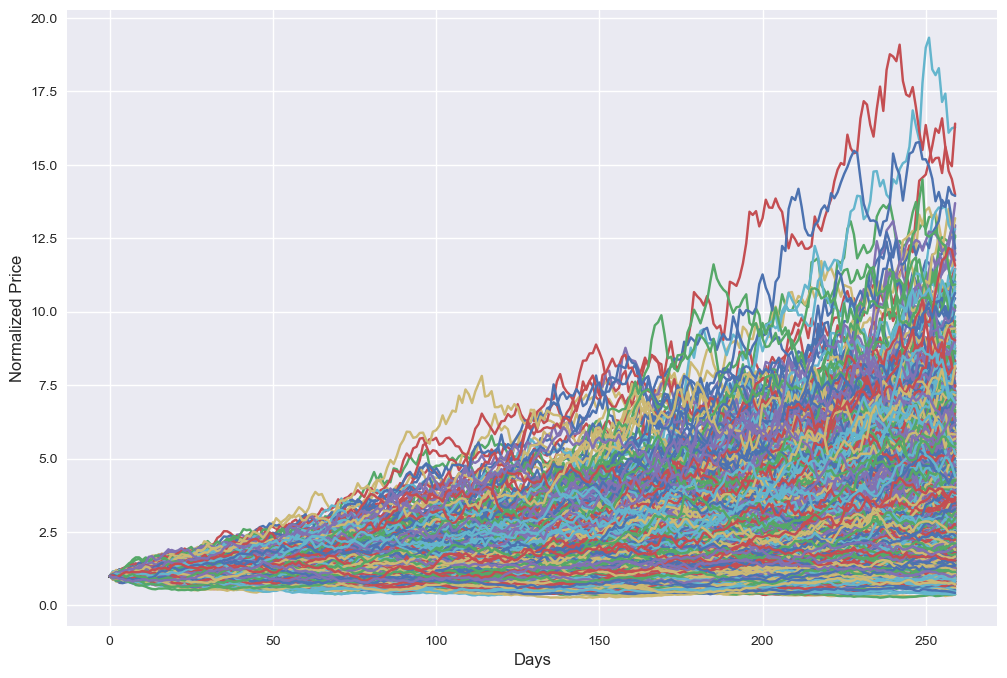

In [62]:
plt.figure(figsize = (12 ,8))
plt.plot(df.values)
plt.xlabel("Days", fontsize = 12)
plt.ylabel("Normalized Price", fontsize = 12)
plt.show()

# some simulation shoes multiples of 20, 
# and some simulations shoes multiple of 0.5

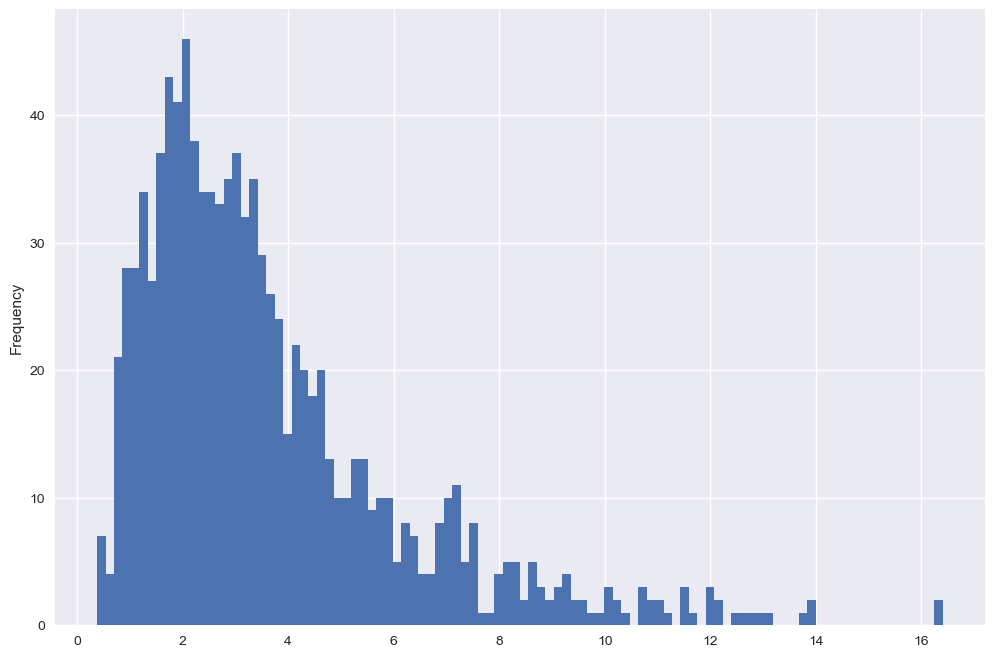

In [63]:
# final multiple after 1 year
# (this is the distribution of the final multiple of each simulation) 
df.iloc[-1].plot(kind = "hist", bins = 100, figsize = (12, 8)) 
plt.show()

# We can see that most of the multiple around 2..

In [64]:
# summery statistics of the final multiples of the simulation 
df.iloc[-1].describe()

# interpretation:
# max -> show us the maximum multiple that was from a siulation
# mean -> the avarage multiple
# and so on... 

count    1000.000000
mean        3.629496
std         2.495625
min         0.377842
25%         1.909573
50%         2.977942
75%         4.550338
max        16.399485
Name: 259, dtype: float64

In [65]:
# get the 10%, 90$ percent tile 
np.percentile(df.iloc[-1], [10, 90])

array([1.2374534 , 7.04113117])

Keep in mind: This assumes normally distributed returns -> In reality, there is (a bit) more weight in the tails.

So far, we ignored annual __Taxes__ and monthly __Income Distributions__ -> Next Step: __path-dependent Simulation__

---

# A path-dependent Simulation with Taxes and Income - Introduction

Why its called path dependent simulation?
> Because the amount of taxes payable and also the income distribution are dependent on the trading performance.

__Tax Payments__

Assumptions: 
- annual, year-end payments.
- Full Trading Profit in a calender year is taxable @ x% flat tax rate (no loss carryforward) <br>
__++++ This is not Tax Advice. Please consult your local tax advisor!!! ++++__

__Income Distributions__

Assumptions: 
- monthly, in arrears
- increase on a monthly basis @ inflation rate

Tax Payments and Income Distributions are limited to Trading Profits and the Trading Capital (can´t get negative). <br> (no additional/subsequent funding)

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
plt.style.use("seaborn-v0_8")

In [82]:
class Trade_Income():
    
    def __init__(self, start, end, I0, dist, infl, tax):
        
        self.start = start  # start simulation
        self.end = end      # end simulation
        self.I0 = I0        # initial trade value (e.g: you put 10,000$ on the strategy...)
        self.dist = dist    # monthly distribution (what you expected monthly income? e.g: you expect gain 500$ in a month?)
        self.infl = infl    # influction (typically in influction is 3% in a year...)
        self.tax_rate = tax # tax (we assume that you need to pay tax each year, at the end of the year)
        self.prepare_data() # prepare the data 
    
    
    # Function to prepare the data
    def prepare_data(self):
        
        self.index = pd.date_range(start = self.start, end = self.end, freq= "D") # 1. Create range of dates as index. 
        self.td_index = pd.date_range(start = self.start, end = self.end, freq= "B") # 2. create range of dates of business days ("B").
        self.days = len(self.td_index) # 3. store the number of trading days 
        self.td_per_year = (self.days / ((self.td_index[-1] - self.td_index[0]).days / 365.25)) # 4. calculate how many trades there are per year
        self.tax_index = pd.date_range(start = self.start, end = self.end, freq= "BA-DEC") # 5. define there need to take tax stands for Business Year End frequency with a fiscal year ending in December
        self.dist_index = pd.date_range(start = self.start, end = self.end, freq= "BM") # 6. stands for Business Month end frequency. (for montly income)
        
        dist = [self.dist * (1 + self.infl)**(i/12) for i in range(len(self.dist_index))] # 7. generate distribution (for montly income, inc influction)
        dist = pd.Series(dist, index = self.dist_index) # 8. set the distribution in a data frame 
        tax = pd.Series(True, index = self.tax_index)   # 9. create data frame of the tax date 
        df = pd.DataFrame(data = {"Dist":dist, "Tax":tax}, index = self.index) # 10. set the distribution (monthly income dates), tax dates, and the index time in a df
        df.Dist.fillna(0, inplace = True) # 11. fill NaN
        df.Tax.fillna(False, inplace = True) # 12. fill NaN
        self.raw_data = df 

    # Function to simulate one (10 years of trades, e.g...) 
    def simulate_one(self, ann_mean, ann_std, seed = 123):
        
        daily_mean = ann_mean / self.td_per_year # 1. compute daily mean log return 
        daily_std = ann_std / np.sqrt(self.td_per_year) # 2. compute daily risk
        
        np.random.seed(seed)
        returns = np.random.normal(loc = daily_mean, scale = daily_std, size = self.days) # 3. create Gaussian, based on the risk & return of the strategy
        returns = pd.Series(np.exp(returns) - 1, index = self.td_index) # 4. convert back to simple returns
        data = self.raw_data.copy() 
        data["returns"] = returns # 5. store the returns
        data.returns.fillna(0, inplace = True) # 6. fill nan
        self.data = data
        
        # call the function >> 
        self.path_dependent()

    # simulate many!     
    def simulate_many(self, ann_mean, ann_std, seed = 123, sims = 1000):
        
        daily_mean = ann_mean / self.td_per_year # daily mean log return
        daily_std = ann_std / np.sqrt(self.td_per_year) # daily risk 
        
        np.random.seed(seed)
        matrix = np.random.normal(loc = daily_mean, scale = daily_std, size = sims * self.days).reshape(sims, self.days) # create 1000 distributions (for 1000 simulators)
        
        # run all the simulation
        results = []
        for sim in range(sims): # for each simulation 
            returns = matrix[sim, :] # extract the specific return distribution of this simulation 
            returns = pd.Series(np.exp(returns) - 1, index = self.td_index) # convert log return to simple return
            data = self.raw_data.copy()
            data["returns"] = returns
            data.returns.fillna(0, inplace = True)
            self.data = data
            self.path_dependent() # run the function >>  
            
            results.append(round(self.data.Equity[-1], 0))
        return results


    def path_dependent(self):
        
        # initialize parameter
        Equity = [I0]   # the initial equity (e.g 10000$)
        Year_Begin = I0 
        Year_Distr = 0  # initial year distribution
        dist_list = []  # list for store the distributions
        tax_list = []   # list for store the tax
        
        df = self.data.copy() # make a copy
    
        for i in range(len(self.index)): # for each date
            equity_bd = Equity[i] * (1 + df.returns[i]) # compute the current equity (e.g equity(100000) * return(1.01) = 10100 ) 
            distribution = min(df.Dist[i], equity_bd) # take the distribution
            dist_list.append(distribution) 
    
            equity_bt = equity_bd - distribution # substruct the distribution (the montly income, from the equity)
            Year_Distr += distribution # increment the yearly distribution (yearly dist = 12 * montly inclome) 
    
            if df.Tax[i]: # if is a tax date
                taxable_income = max(0, Year_Distr + equity_bt - Year_Begin) # take the max, (the profit/0)
                tax_pay = self.tax_rate * taxable_income # compute tax paymant 
                tax_list.append(tax_pay) 
                equity_at = max(0, equity_bt - tax_pay) # compute equity after tax pay
                Year_Begin = equity_at # update the begining of the year (after tasks paying) 
                Year_Distr = 0 # reset the yearly distribution 
    
            else:
                equity_at = equity_bt
    
            Equity.append(equity_at)
        
        df["Equity"] = Equity[1:]
        df["Dist"] = dist_list
        df["Tax"] = pd.Series(tax_list, index = self.tax_index)
        df.Tax.fillna(0, inplace = True)
        
        self.data = df   

In [70]:
start = "2020-01-01"
end = "2029-12-31" # 10 years
I0 = 10000   # initial trading capital
dist = 545.7 # (initial) monthly distribution
infl = 0.03  # inflation rate
tax = 0.25   # flat tax rate

In [71]:
TI = Trade_Income(start, end, I0, dist, infl, tax)
TI

__One Simulation__

In [72]:
# Annualize mean return and risk of our strategy
ann_mean = 1.05 
ann_std = 0.67 

In [73]:
# Let's simulate one
TI.simulate_one(ann_mean, ann_std, seed = 123)

C:\Users\97250\AppData\Local\Temp\ipykernel_26428\2660886261.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equity_bd = Equity[i] * (1 + df.returns[i])
C:\Users\97250\AppData\Local\Temp\ipykernel_26428\2660886261.py:78: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distribution = min(df.Dist[i], equity_bd)
C:\Users\97250\AppData\Local\Temp\ipykernel_26428\2660886261.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.Ta

In [74]:
TI.data

,Dist,Tax,returns,Equity
2020-01-01,0.000,0.000,-0.040,"9,598.245"
2020-01-02,0.000,0.000,0.046,"10,043.958"
2020-01-03,0.000,0.000,0.016,"10,203.516"
2020-01-04,0.000,0.000,0.000,"10,203.516"
2020-01-05,0.000,0.000,0.000,"10,203.516"
...,...,...,...,...
2029-12-27,0.000,0.000,0.004,"35,782.161"
2029-12-28,0.000,0.000,-0.038,"34,414.506"
2029-12-29,0.000,0.000,0.000,"34,414.506"
2029-12-30,0.000,0.000,0.000,"34,414.506"


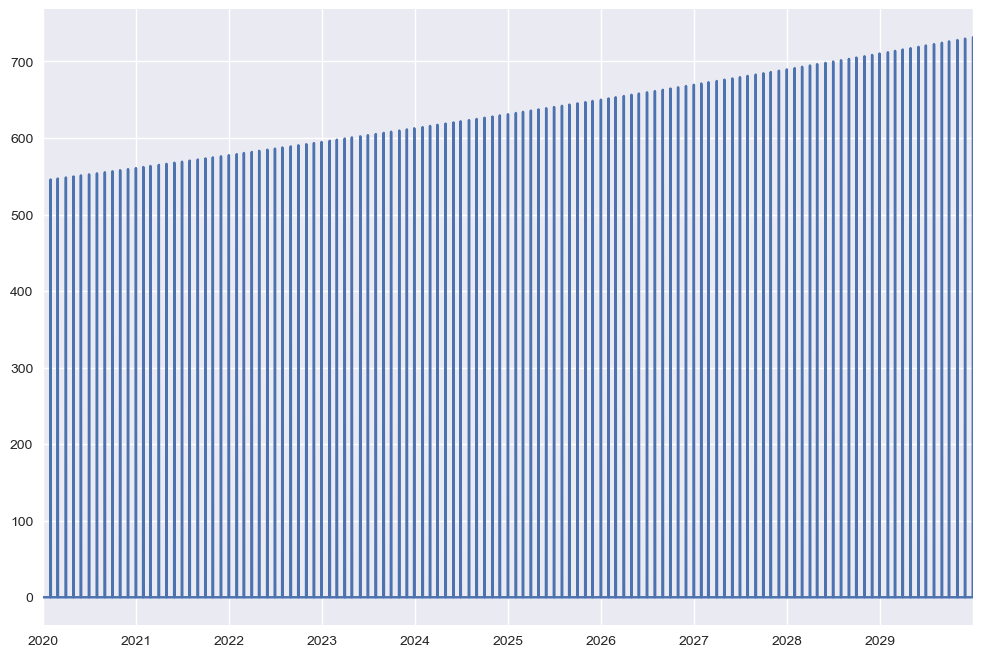

In [75]:
# income distributions over time
TI.data.Dist.plot(figsize = (12, 8)) 
plt.show()

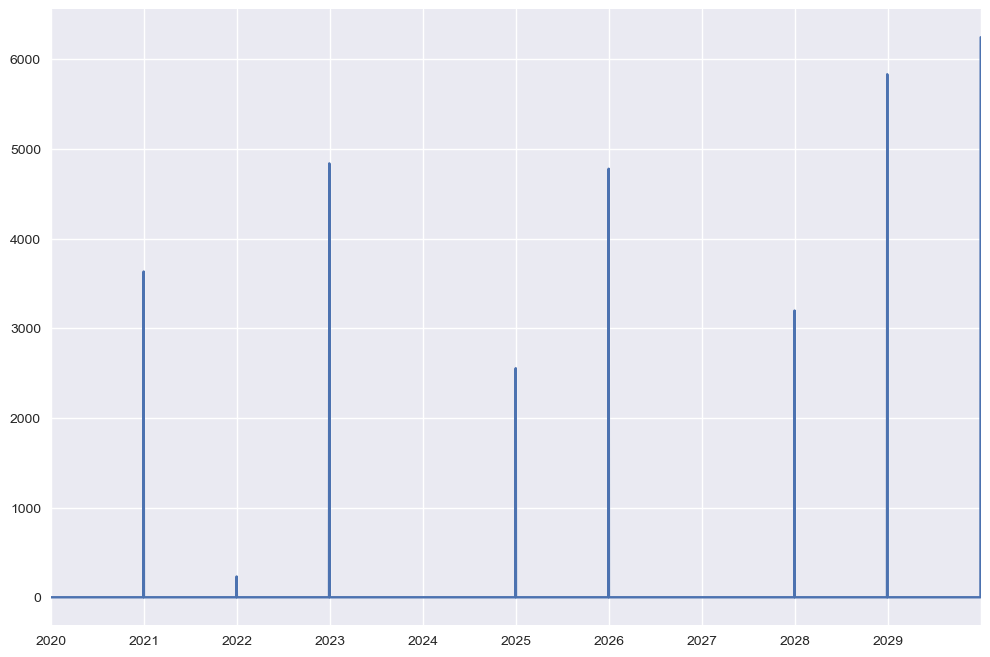

In [76]:
# tax payments in each year 
# (we assume that we need to pay taxs in the end of each year)
TI.data.Tax.plot(figsize = (12, 8)) 
plt.show()

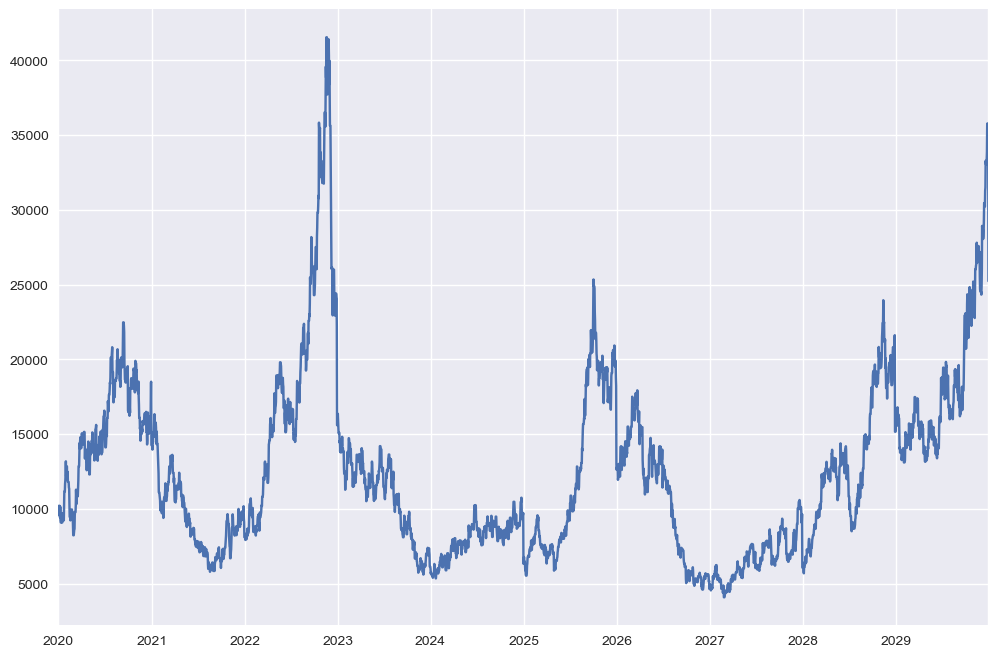

In [77]:
# Equity (Trading Capital)
TI.data.Equity.plot(figsize = (12, 8)) 
plt.show()

In [78]:
# calculate our capital that shall increase by the influstion
required_end_value = I0 * (1+infl)**10 # capital shall increase @ 3% p.a.
required_end_value

13439.163793441223

In [83]:
# if our final Equity greater then the required_end_value, its good. 
TI.data.Equity[-1] > required_end_value

C:\Users\97250\AppData\Local\Temp\ipykernel_26428\626134943.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TI.data.Equity[-1] > required_end_value


True

---

# A path-dependent Simulation with Taxes and Income - many Simulations

In [84]:
start = "2020-01-01"
end = "2029-12-31"
I0 = 10000 # initial trade value
distr = 545.7 # (initial) monthly distribution
infl = 0.03
tax = 0.25

In [85]:
ann_mean = 1.05
ann_std = 0.67 

In [86]:
TI = Trade_Income(start, # start simulation 
                  end, # end simulation
                  I0, # initial value
                  distr, # distribution
                  infl, # indlusion
                  tax) # tax 
TI

In [ ]:
results = TI.simulate_many(ann_mean, ann_std, seed = 123, sims = 1000)

In [89]:
results[:10]

[25230.0,
 512713884.0,
 500903.0,
 3405722.0,
 5648124044.0,
 2492242.0,
 287655179.0,
 554314.0,
 30795034.0,
 0.0]

In [90]:
len(results)

1000

In [91]:
required_end_value

13439.163793441223

In [93]:
# shortfall probabilty over the next 10 years
(np.array(results) < required_end_value).mean()

0.317

> <p style="color:red"> With an initial Income Distribution of USD 545.7, the shortfall probability over the next 10 years is 31.7%</p> <br>
<strong style="color:red">Level of Income is not sustainable.</strong>

---

# Shortfall Risk and a Sustainable Income Level

__Determine a sustainable income distribution level with a shortfall probability of approx. 5%.__

(Acceptable Shortfall Probability depends on the Individual´s Risk Tolerance)

A Trader has created a levered trading strategy that (on average) generates an __annualized mean return of 105%__ (log) with a __standard deviation of 67%__. <br>
The applicable (flat) __tax rate is 25%__ and the __inflation__ protection shall be __3% p.a.__<br>
Calculate the Trader´s __sustainable income__ if the trader starts with __USD 10,000__ (available funds for trading).

base on that,
this is the simple solusion:

In [94]:
# Its the incorrect solusion, beacuse we dont take in account time and risk
simple_sol = 1136
simple_sol

1136

__Rule of Thumb: Adjustment Factor between 20% and 50%__

In [95]:
adj_factor = 0.25 # 25%

In [96]:
# Calculate the distribution
distr = simple_sol * adj_factor
distr

# And this gives a monthly income distribution and initial distribution of 284.

284.0

In [97]:
TI = Trade_Income(start, end, I0, distr, infl, tax)
TI

In [ ]:
results = TI.simulate_many(ann_mean, ann_std, seed = 123, sims = 1000)

In [102]:
len(results),results[:10]

(1000,
 [36079686.0,
  2074238160.0,
  18293686.0,
  84070324.0,
  6884796307.0,
  10725417.0,
  358798381.0,
  2518218.0,
  70940249.0,
  2863304.0])

In [103]:
required_end_value

13439.163793441223

In [101]:
# shortfall probabilty after 10 years
(np.array(results) < required_end_value).mean() 

0.057

__-> 25% of simple Solution Income!__

> __So an initial monthly income distribution of 284 dollars might be the sustainable level of income for our trading strategy and our situation.__

---


# Final Remarks

__Final Remarks__

- (Trying to) simulate the Future is not an exact science
- It is based on various assumptions and uncertainties
- there are more complex/accurate models
- very effective additional feature: making dynamic (path-dependent) adjustments to income distributions

Key message: If Income Distributions are too high, Risk of running out of trading capital is high as well.
Approx. __20% to 50%__ of simple solution Income!

__Excursus: Advanced Performance Attribution__

Simple Solution Income: __USD 1136__ <br>
Actual (sustainable) Income: __USD 284__

-> The Difference is attributable to __Timing__ and __Risk__. What´s the sustainable Income if we assume __zero Risk__?

In [104]:
start = "2020-01-01"
end = "2029-12-31"
I0 = 10000
distr = 739.08 # sustainable monthly income assuming zero risk
infl = 0.03
tax = 0.25

In [105]:
ann_mean = 1.05
ann_std = 0 # zero risk

In [106]:
TI = Trade_Income(start, end, I0, distr, infl, tax)
TI

In [107]:
TI.simulate_one(ann_mean, ann_std, seed = 123)

C:\Users\97250\AppData\Local\Temp\ipykernel_26428\2660886261.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equity_bd = Equity[i] * (1 + df.returns[i])
C:\Users\97250\AppData\Local\Temp\ipykernel_26428\2660886261.py:78: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distribution = min(df.Dist[i], equity_bd)
C:\Users\97250\AppData\Local\Temp\ipykernel_26428\2660886261.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.Ta

In [108]:
TI.data

,Dist,Tax,returns,Equity
2020-01-01,0.000,0.000,0.004,"10,040.321"
2020-01-02,0.000,0.000,0.004,"10,080.804"
2020-01-03,0.000,0.000,0.004,"10,121.451"
2020-01-04,0.000,0.000,0.000,"10,121.451"
2020-01-05,0.000,0.000,0.000,"10,121.451"
...,...,...,...,...
2029-12-27,0.000,0.000,0.004,"18,630.921"
2029-12-28,0.000,0.000,0.004,"18,706.043"
2029-12-29,0.000,0.000,0.000,"18,706.043"
2029-12-30,0.000,0.000,0.000,"18,706.043"


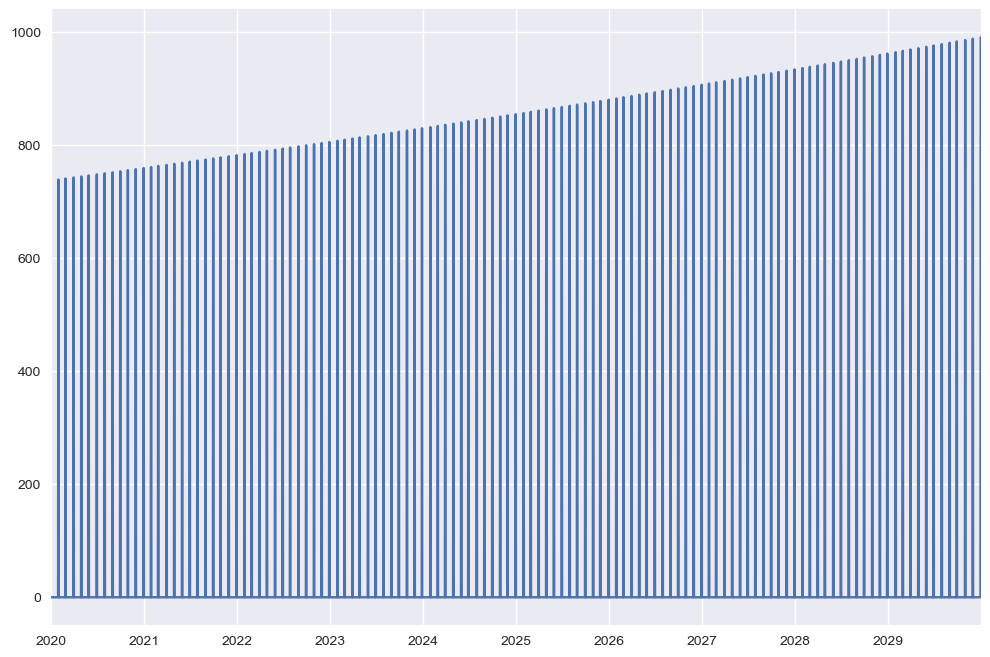

In [109]:
TI.data.Dist.plot(figsize = (12, 8))
plt.show()

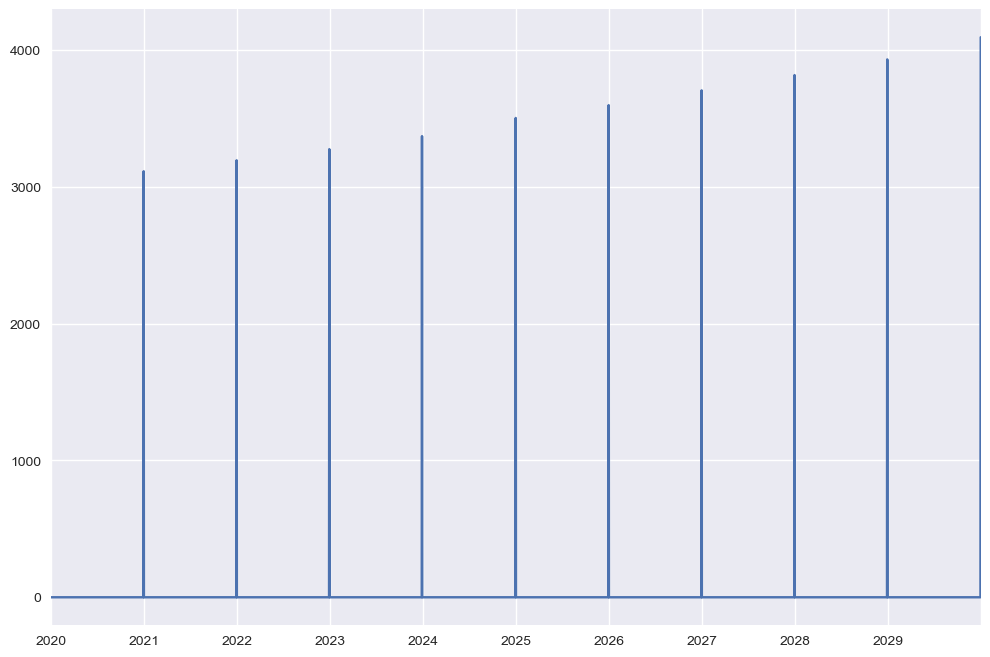

In [110]:
TI.data.Tax.plot(figsize = (12, 8))
plt.show()

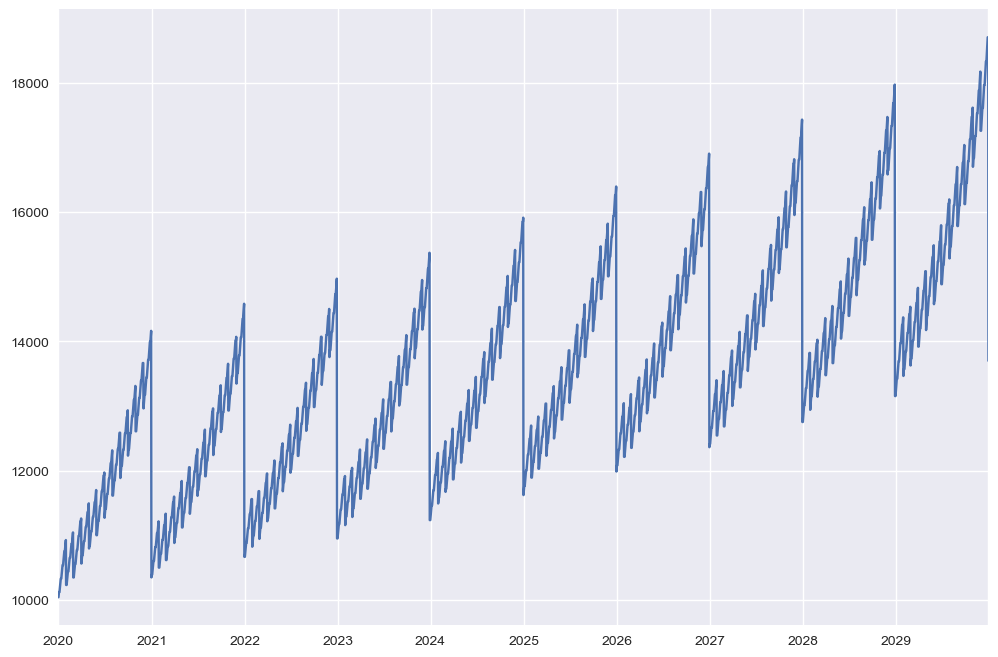

In [111]:
TI.data.Equity.plot(figsize = (12, 8))
plt.show()

- 284 -> 739 attributable to Risk
- 739 -> 1136 attributable to Timing